In [1]:
from client import start_client
import matplotlib.pyplot as plt
import numpy as np
import time
from matplotlib.pyplot import figure
from main_func import main,real_partial
from plotting import plot, plot_workers
from jupyterthemes import jtplot

client,w=start_client(33)
client

<Client: 'tcp://127.0.0.1:41322' processes=33 threads=33, memory=33.69 GB>


Client Scheduler: tcp://127.0.0.1:41322 Dashboard: http://127.0.0.1:8787/status,Cluster Workers: 33 Cores: 33 Memory: 33.69 GB


### Main function
- make_classification parameters: https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_classification.html?highlight=make_classification#sklearn.datasets.make_classification
- choose e, and chunk size
- run multiple times to produce plots


### Initialize
***

In [2]:
jtplot.style(theme='grade3') #light plot theme

batches=30000 #number of minibatches
batch_size=1 #size of each minibatch
e=0.8 #tolerance for φ(χ)

#compute samples size
training_s=batches*batch_size
n_samples=int(3*training_s/2) # 1/3 of the samples will be used for testing

#parameters for make classification
dataset_params={
    "n_samples":n_samples,
    "n_features":1000,
    "n_informative":10,
    "n_redundant":0,
    "n_repeated":0,
    "n_classes":2,
    "n_clusters_per_class":1,
    "flip_y":0,
    "weights":[0.7,0.3],
    "random_state":17
}
threshold=0.03

chunks=100
e_array=[0.8]
sizes=[30000,50000,100000,150000,200000,300000]
minibatches=[10,50,100]
new="no" #choose if you want to recreate the dataset

### Dataset with no noise flip_y=0
***
#### Balanced
- weights=[0.5,0,5]

In [3]:
# 3 different e
new="no"
dataset_params["weights"]=[0.5,0.5]
Acc_threshold=[]
Rounds_threshold=[]
Time_threshold=[]
labels=[[]]

for i in e_array :
    e=i
    Acc,time_l,total_rounds,total_time=main(client,w,new,dataset_params,e,chunks,minibatches[0])
    new="no"
    Acc_threshold.append(Acc)
    Rounds_threshold.append(total_rounds)
    Time_threshold.append(time_l)
    time.sleep(5)

-------------------------------------------------------------

Start with num of chunks: 100 ,e: 0.8
Minibatch size: 30.0
Number of chunks for each worker:  3
In progress...
[1, 32, 0.32168078422546387]
Accuracy: 92.473333
[2, 32, 0.7635166645050049]
Accuracy: 93.333333
[2, 0, 1.112224817276001]
Accuracy: 94.346667

**
 Pass 0 completed
**

[1, 0, 0.3514385223388672]
Accuracy: 94.233333

**
 Pass 1 completed
**

Total time [1.112224817276001, 0.3514385223388672]


In [4]:

time_centr,Acc_real1,f_acc=real_partial(chunks*minibatches[0])
len_real1=np.array([i for i in range(len(Acc_real1))])

labels[0]="Real"


Start...
----------------------------------------------

Accuracy: 83.560000
Accuracy: 85.333333
Accuracy: 86.793333
Accuracy: 87.693333
Accuracy: 87.526667
Accuracy: 87.420000
Accuracy: 88.080000
Accuracy: 88.480000
Accuracy: 88.506667
Accuracy: 89.313333
Accuracy: 89.413333
Accuracy: 89.626667
Accuracy: 89.806667
Accuracy: 89.706667
Accuracy: 89.873333
Accuracy: 90.200000
Accuracy: 90.173333
Accuracy: 90.373333
Accuracy: 90.333333
Accuracy: 90.393333
Accuracy: 90.140000
Accuracy: 90.640000
Accuracy: 90.606667
Accuracy: 90.580000
Accuracy: 91.073333
Accuracy: 90.833333
Accuracy: 90.973333
Accuracy: 91.060000
Accuracy: 91.313333
Accuracy: 90.940000
Accuracy: 91.293333
Accuracy: 91.166667
Accuracy: 91.580000
Accuracy: 91.600000
Accuracy: 91.526667
Accuracy: 91.666667
Accuracy: 91.526667
Accuracy: 91.566667
Accuracy: 91.760000
Accuracy: 91.426667
Accuracy: 91.540000
Accuracy: 91.446667
Accuracy: 91.506667
Accuracy: 91.673333
Accuracy: 91.653333
Accuracy: 91.846667
Accuracy: 91.900000
Acc

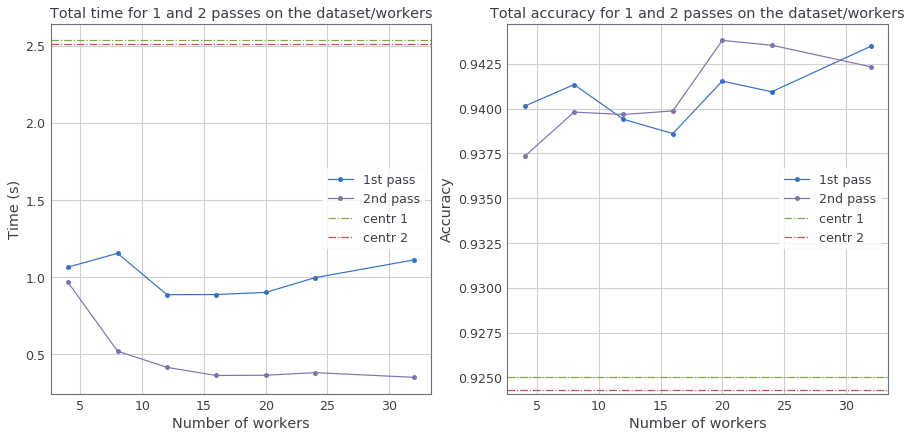

In [5]:

time_centr
np.load("np_arrays/total_time"+str(16)+".npy")
plot_workers([4,8,12,16,20,24,32],time_centr,f_acc)

In [6]:
# name="Plots/3_Threshold_w_"+str(len(w))+"_samples_"+str(dataset_params["n_samples"])+"_features_"+str(dataset_params["n_features"])+"_e_"+str(e_array)+".png"
# plot(l1,l2,Acc_threshold,Rounds_threshold,Time_threshold,e_array,labels,name,'threshold')

In [7]:
# from IPython.display import Audio, display
# display(Audio(url='http://peal.io/download/5e289.wav', autoplay=True))
# http://peal.io/download/mr5xx.wav

In [8]:
# Acc_minibatch=[]
# Rounds_minibatch=[]
# Time_minibatch=[]
# e=0.2
# for i in minibatches :
#     minibatch=i
#     Acc,n_rounds,time_stamps=main(client,w,new,dataset_params,e,chunks,minibatch)
#     new="no"
#     Acc_minibatch.append(Acc)
#     Rounds_minibatch.append(n_rounds)
#     Time_minibatch.append(time_stamps)
#     time.sleep(5)

In [9]:
# name="Plots/Minibatch_4x_w_"+str(len(w))+"_samples_"+str(dataset_params["n_samples"])+"_features_"+str(dataset_params["n_features"])+"_minib_"+str(minibatches)+".png"
# plot(l1,l2,Acc_minibatch,Rounds_minibatch,Time_minibatch,minibatches,labels,name,'minibatches')

### Save results

In [10]:
f = open("result.txt", "a")
f.writelines(["\n\n==========================================================================="])
f.writelines(["\nNEW EXPERIMENT:\nparams:",str(dataset_params),"\nminibaches_size:"
              ,str(minibatches),"\ndifferent e's:",str(e_array),"\nn_workers: ",str(len(w))])
f.writelines(["\n___________________________________________________________________________"])
f.writelines(["\nRESULTS:\nAcc_threshold",str(Acc_threshold),"\nRounds_threshold",str(Rounds_threshold),
             "\nTime_threshold",str(Time_threshold),"\nlen_real1",str(len_real1),"\nAcc_real1",str(Acc_real1)])
f.close()

### Shutdown client

In [11]:
client.close()
client.shutdown()